- ##### Jihane Fichtal

- ##### Groupe : Ai 101

- ##### Projet : "DiabetesRisk_Data"

- ##### description générale de données :

- ##### Ce jeu de données contient des informations sur les facteurs de risque du diabète, incluant des mesures biomédicales (comme l'IMC, les niveaux de glucose, l'HbA1c, le cholestérol et la pression artérielle) ainsi que des habitudes de vie (activité physique, consommation d'alcool, tabagisme). Il inclut également des antécédents familiaux et personnels de diabète. Ces données peuvent être utilisées pour analyser les risques de développer le diabète.

- #### L’explication des colonnes du dataset :

| Column                        | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| Unnamed: 0                     | Index or unique identifier for each record.                                |
| Age                            | Age of the patient in years.                                                |
| Sex                            | Gender of the patient (Female or Male).                                     |
| Ethnicity                      | Ethnic background of the patient (e.g., White, Asian, Black).               |
| BMI                            | Body Mass Index, a measure of body fat based on height and weight.          |
| Waist_Circumference            | Waist circumference in centimeters, indicating obesity risk.                |
| Fasting_Blood_Glucose          | Fasting blood glucose levels, indicating insulin resistance or diabetes risk. |
| HbA1c                          | Glycated hemoglobin, average blood sugar over 2-3 months.                   |
| Blood_Pressure_Systolic        | Systolic blood pressure (upper number when measuring blood pressure).       |
| Blood_Pressure_Diastolic       | Diastolic blood pressure (lower number when measuring blood pressure).      |
| Cholesterol_Total              | Total cholesterol level in the blood.                                       |
| Cholesterol_HDL                | HDL cholesterol (good cholesterol).                                         |
| Cholesterol_LDL                | LDL cholesterol (bad cholesterol).                                          |
| VLDL                           | Very low-density lipoprotein cholesterol level.                             |
| GGT                            | Gamma-glutamyl transferase, an enzyme indicating liver disease.             |
| Serum_Urate                    | Serum urate level, related to gout and kidney health.                       |
| Physical_Activity_Level        | Level of physical activity (e.g., Low, Moderate).                           |
| Dietary_Intake_Calories        | Daily caloric intake by the patient.                                        |
| Alcohol_Consumption            | Alcohol consumption status (e.g., Low, Moderate, Heavy).                    |
| Smoking_Status                 | Smoking status (e.g., Never, Current, Former).                              |
| Family_History_of_Diabetes     | Family history of diabetes (0: No, 1: Yes).                                 |
| Previous_Gestational_Diabetes  | History of gestational diabetes (0: No, 1: Yes).                            |

- #### Importation des bibliothèques nécessaires :

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve

- #### importation de Dataset :


In [7]:
dt=pd.read_csv('diabetes_dataset.csv')
dt

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


- ##### Exploration générale de data:

In [8]:
dt.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [9]:
dt.dtypes

Unnamed: 0                         int64
Age                                int64
Sex                               object
Ethnicity                         object
BMI                              float64
Waist_Circumference              float64
Fasting_Blood_Glucose            float64
HbA1c                            float64
Blood_Pressure_Systolic            int64
Blood_Pressure_Diastolic           int64
Cholesterol_Total                float64
Cholesterol_HDL                  float64
Cholesterol_LDL                  float64
GGT                              float64
Serum_Urate                      float64
Physical_Activity_Level           object
Dietary_Intake_Calories            int64
Alcohol_Consumption               object
Smoking_Status                    object
Family_History_of_Diabetes         int64
Previous_Gestational_Diabetes      int64
dtype: object

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [11]:
dt.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

- #### afficher les statistiques du data :

In [12]:
dt.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


- ##### Gérer les valeurs manquantes :

In [13]:
# combien des valures null dans chaque colonne :
print(dt.isnull().sum())

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


In [14]:
# Remplacer les valeurs manquantes dans 'Alcohol_Consumption' par une valeur par défaut
dt['Alcohol_Consumption'].fillna('Aucune consommation', inplace=True)

C:\Users\Jiha n\AppData\Local\Temp\ipykernel_12716\3568191791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Alcohol_Consumption'].fillna('Aucune consommation', inplace=True)


#### ~Vérification~ 

In [15]:
print(dt.isnull().sum())

Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64


- #### afficher les doublons :

In [16]:
dt.duplicated().sum()

np.int64(0)

- #### Visualisation :

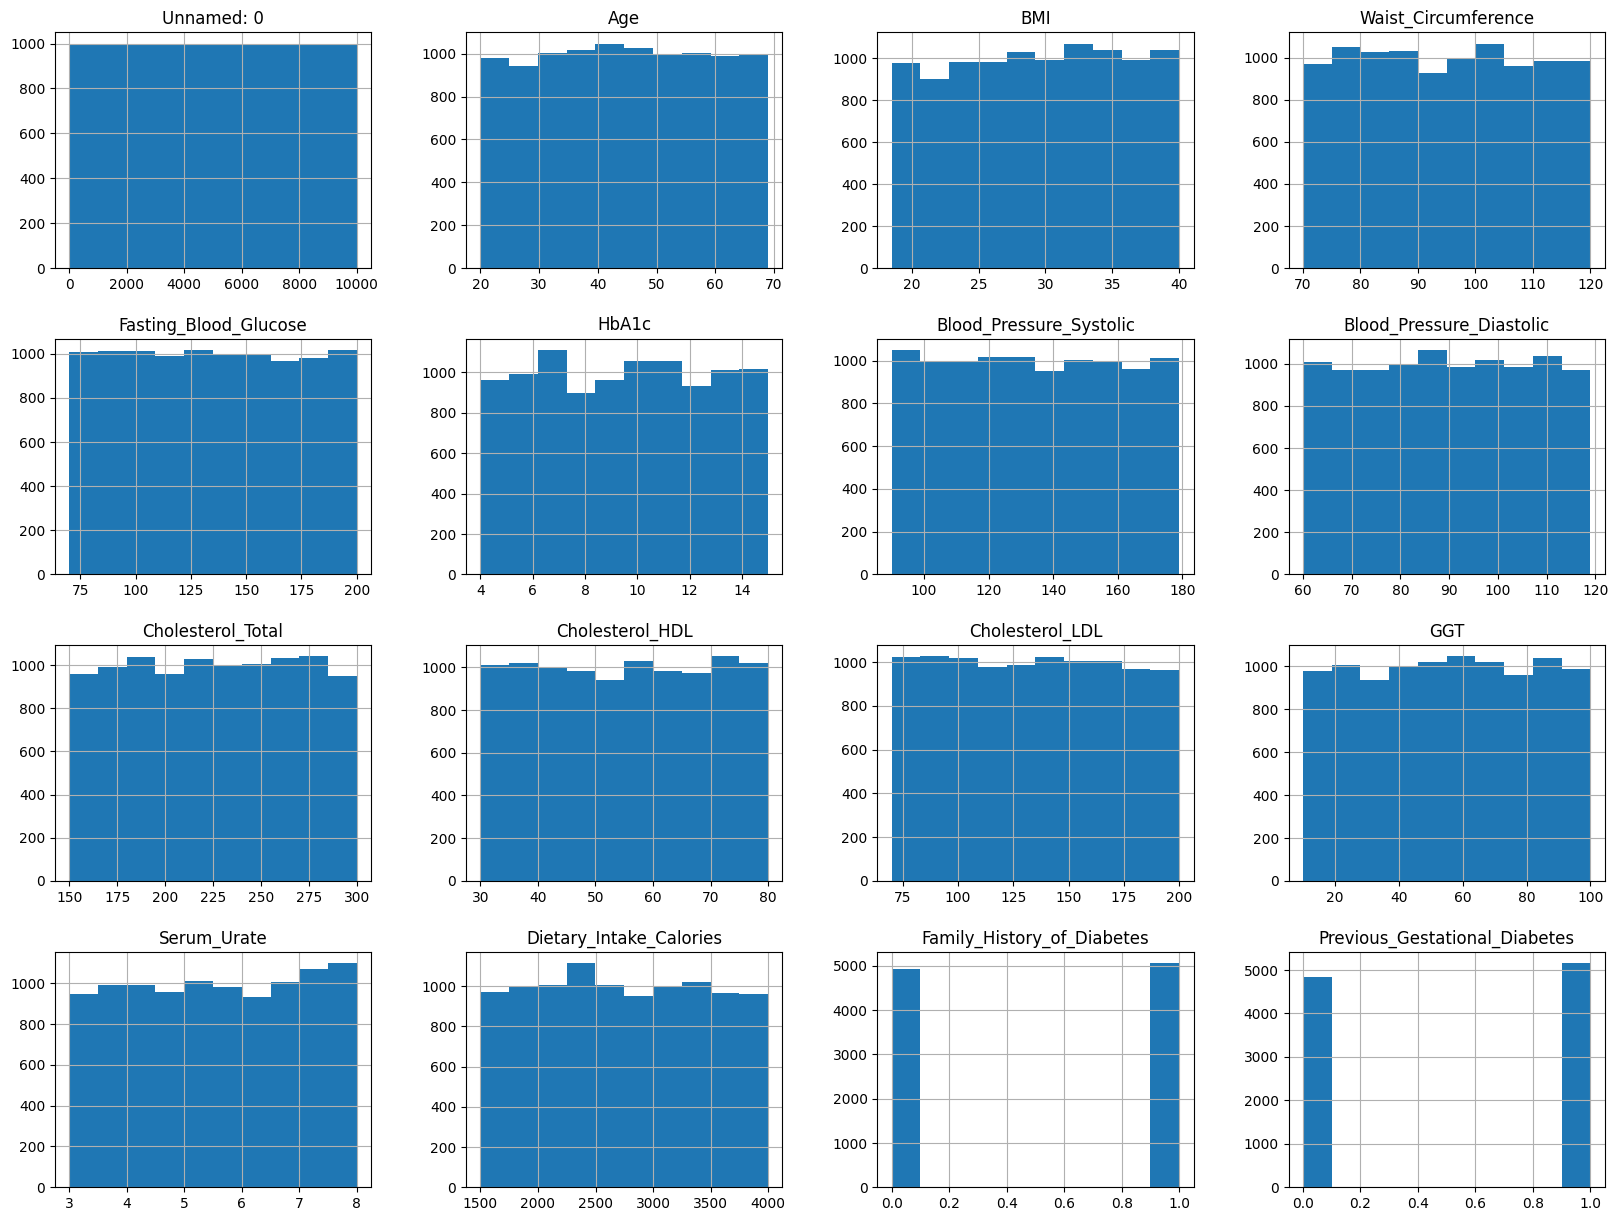

In [17]:
dt.hist(figsize = (20,15))
plt.show()

- #### 1. Histogramme de l'Âge :

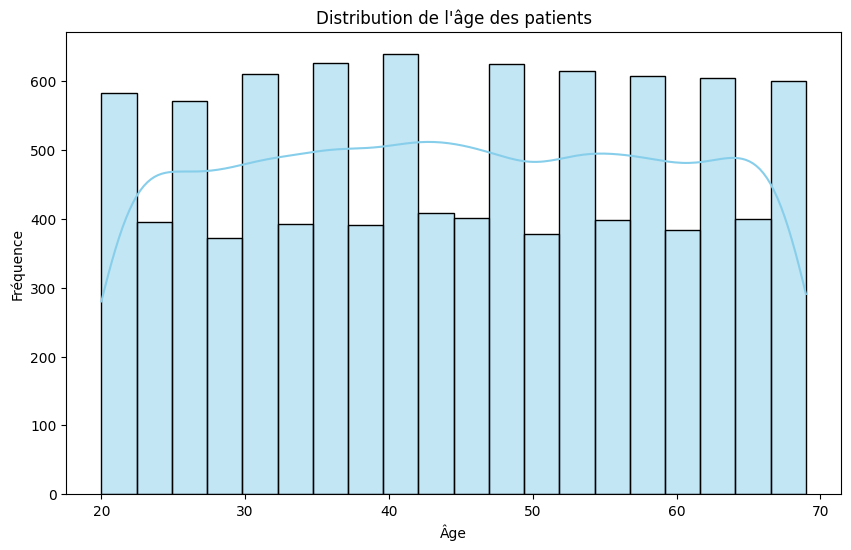

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution de l\'âge des patients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

- #### 2. Répartition par Sexe:

C:\Users\Jiha n\AppData\Local\Temp\ipykernel_12716\3861527252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=dt, palette='Set2')


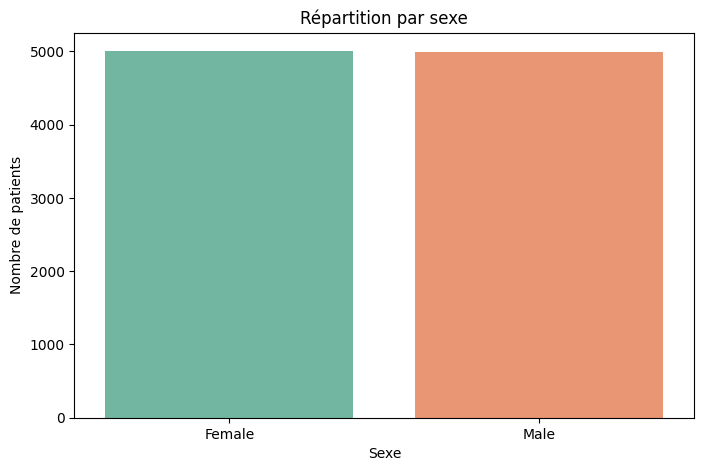

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=dt, palette='Set2')
plt.title('Répartition par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de patients')
plt.show()

- #### 3. Répartition de la Consommation d'Alcool  :

C:\Users\Jiha n\AppData\Local\Temp\ipykernel_12716\4026894220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Alcohol_Consumption', data=dt, palette='viridis')


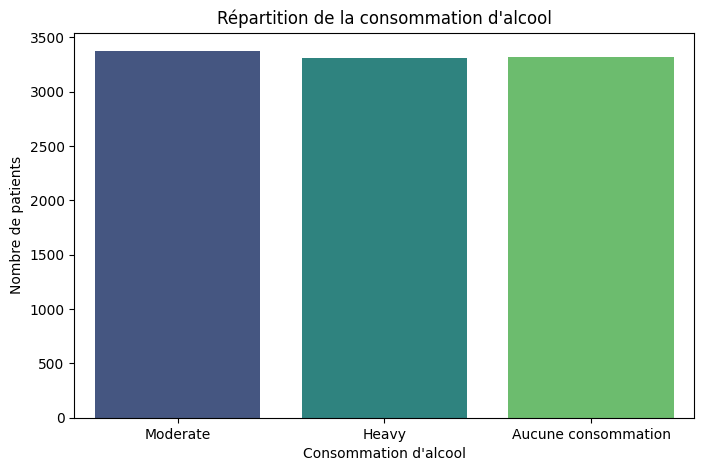

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Alcohol_Consumption', data=dt, palette='viridis')
plt.title('Répartition de la consommation d\'alcool')
plt.xlabel('Consommation d\'alcool')
plt.ylabel('Nombre de patients')
plt.show()

- #### machine learning :

separation , entrainement


In [21]:
X = dt.drop(columns=['Previous_Gestational_Diabetes'])
y = dt['Previous_Gestational_Diabetes']

# ***Séparation du données :***

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:


# Drop the 'Unnamed' column
data_cleaned = dt.drop(columns=['Unnamed: 0'])



# ***L'encodage des colonnes :***

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Exemple : encoder 'Sexe' dans X
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])  # 'Female' => 0, 'Male' => 1 (par exemple)


# ***Appliquation de over_samling :***

In [25]:
print(X.dtypes)


Unnamed: 0                      int64
Age                             int64
Sex                             int64
Ethnicity                      object
BMI                           float64
Waist_Circumference           float64
Fasting_Blood_Glucose         float64
HbA1c                         float64
Blood_Pressure_Systolic         int64
Blood_Pressure_Diastolic        int64
Cholesterol_Total             float64
Cholesterol_HDL               float64
Cholesterol_LDL               float64
GGT                           float64
Serum_Urate                   float64
Physical_Activity_Level        object
Dietary_Intake_Calories         int64
Alcohol_Consumption            object
Smoking_Status                 object
Family_History_of_Diabetes      int64
dtype: object


In [26]:
import pandas as pd

X = pd.get_dummies(X, drop_first=True)


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [28]:
y.value_counts()

Previous_Gestational_Diabetes
1    5165
0    4835
Name: count, dtype: int64

# ***Modele logistic regression :***

In [29]:
import pandas as pd

# Transforme toutes les colonnes catégorielles en colonnes numériques (0/1)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [30]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\Jiha n\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# ***Prédiction :**

In [32]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

Accuracy: 0.50
F1 Score: 0.63
              precision    recall  f1-score   support

           0       0.45      0.14      0.22       967
           1       0.51      0.84      0.63      1033

    accuracy                           0.50      2000
   macro avg       0.48      0.49      0.43      2000
weighted avg       0.48      0.50      0.43      2000



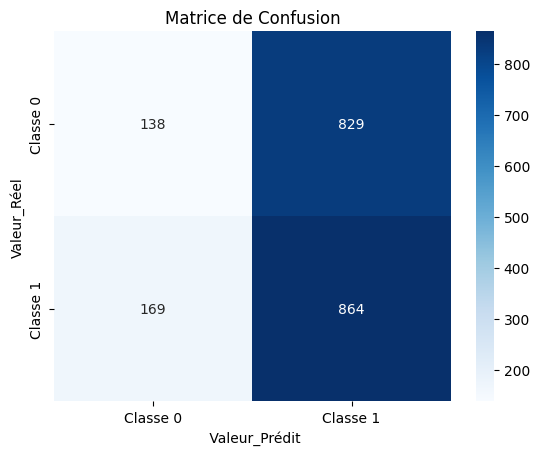

In [33]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

# ***KNN:***

In [34]:
# Définition du modèle KNN avec k=5
from sklearn.neighbors import KNeighborsClassifier
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"Modèle KNN entraîné avec k={k}.")

Modèle KNN entraîné avec k=9.


Précision du modèle KNN: 0.50
F1 Score: 0.53
Rapport de classification :
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       967
           1       0.51      0.54      0.53      1033

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



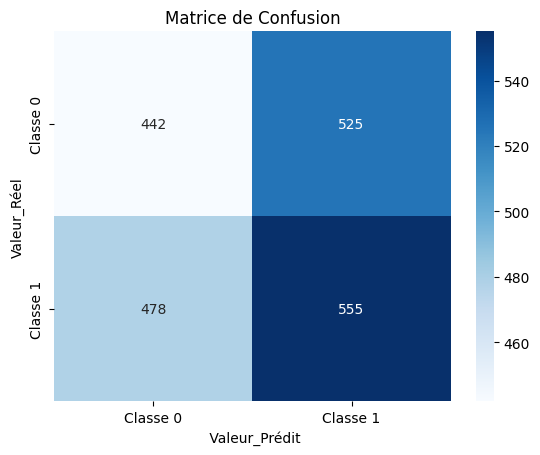

In [35]:
# Prédictions sur les données de test
y_pred = knn.predict(X_test)

# Calcul de l'accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Précision du modèle KNN: {accuracy_knn:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# # Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

# ***Decision Tree :***

Modèle d'Arbre de Décision entraîné avec succès.
accuracy: 0.51
F1 Score: 0.65


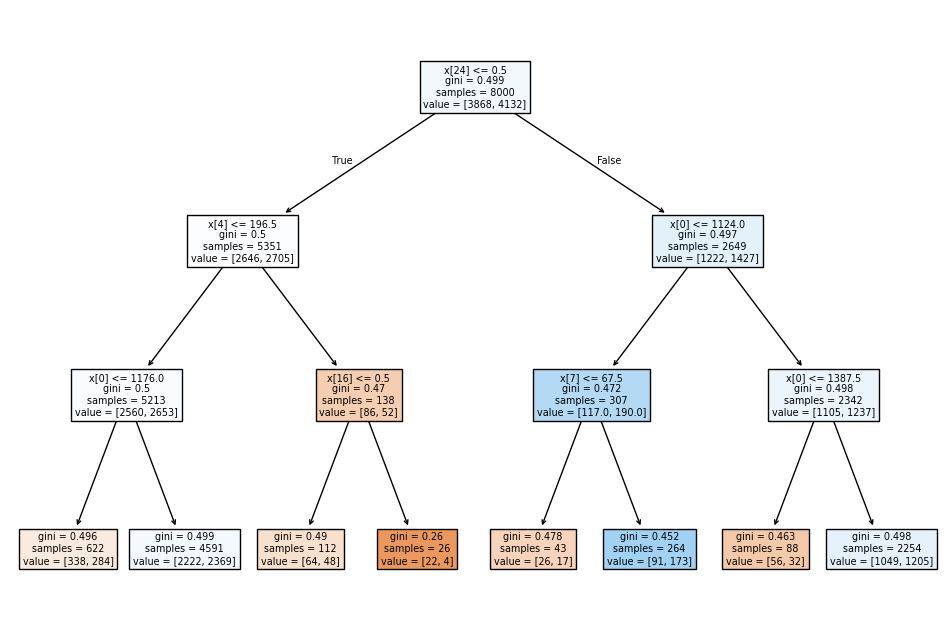

In [36]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Définition du modèle d'arbre de décision
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print("Modèle d'Arbre de Décision entraîné avec succès.")


# Prédiction sur les données test
y_pred = dt.predict(X_test)

# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy_dt:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Visualisation de l’arbre de décision
# Affichage de l'arbre
plt.figure(figsize=(12, 8))
plot_tree(dt,filled=True)
plt.show()

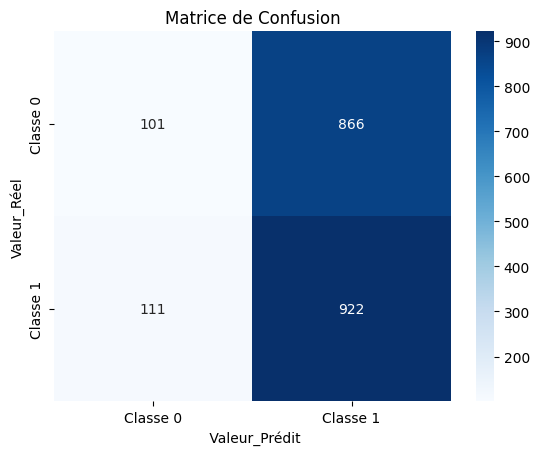

In [37]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

# ***Random forest :***

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Définition du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Modèle Random Forest entraîné avec succès.")

Modèle Random Forest entraîné avec succès.


Précision du modèle Random Forest: 0.50
F1 Score: 0.53
Rapport de classification :
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       967
           1       0.52      0.55      0.53      1033

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



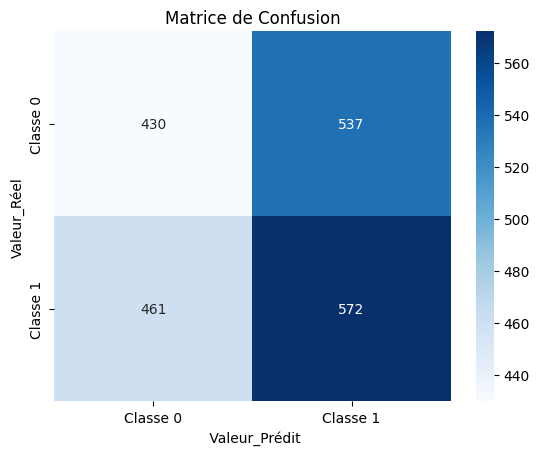

In [39]:
# Evaluation du modèle
# Prédictions sur les données de test
y_pred = rf.predict(X_test)

# Calcul de l'accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Précision du modèle Random Forest: {accuracy_rf:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

# ***SVM :***

Accuracy de SVM: 0.49
F1 Score: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40       967
           1       0.51      0.63      0.56      1033

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.49      0.48      2000



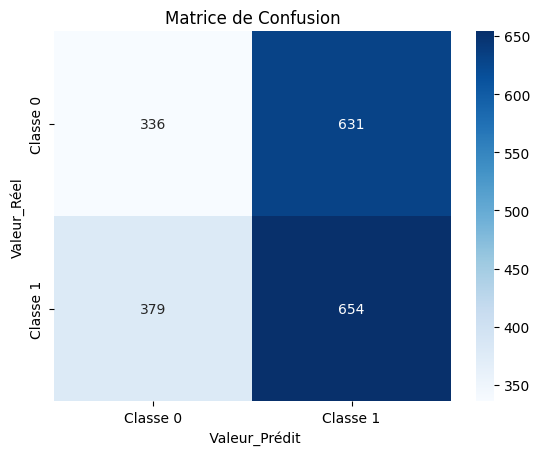

In [40]:
# Créer le modèle SVM avec noyau linéaire
from sklearn.svm import SVC
model = SVC(kernel="linear",C=1.0)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy de SVM: {accuracy_svm:.2f}")
# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()


# ***Comparaison des modéles :***

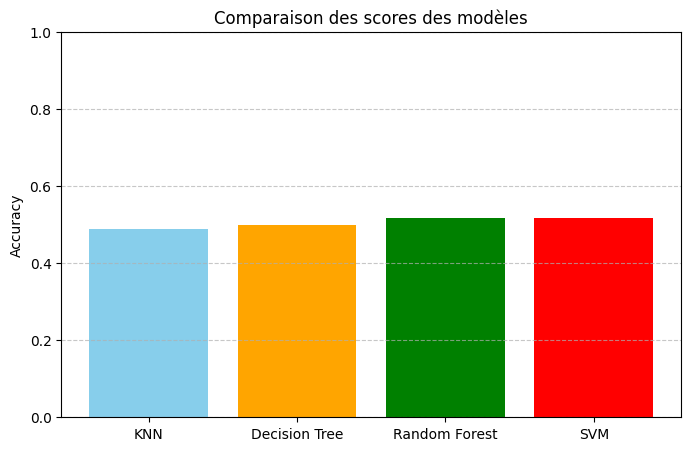

In [41]:
# Dictionnaire des modèles
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Stockage des scores
scores = {}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

#  Tracer le graphe
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.title('Comparaison des scores des modèles')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # scores entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- ### Conclusion :


# ***L'accuracy :***

In [44]:
print(f"L'accuracy du logistic regression : {accuracy:.2f}")
print(f"L'accuracy du modèle decision tree : {accuracy_dt:.2f}")
print(f"L'accuracy du modèle SVM : {accuracy_svm:.2f}")
print(f"L'accuracy du modèle KNN : {accuracy_knn:.2f}")
print(f"L'accuracy du modèle Random Forest : {accuracy:.2f}")

L'accuracy du logistic regression : 0.50
L'accuracy du modèle decision tree : 0.51
L'accuracy du modèle SVM : 0.49
L'accuracy du modèle KNN : 0.50
L'accuracy du modèle Random Forest : 0.50


- #### 2. Rapport de classification :

In [46]:
from sklearn.metrics import classification_report
# Rapport de classification pour Logistic Regression
print("Rapport de classification : Logistic Regression")
print(classification_report(y_test, y_pred))
# Rapport de classification pour KNN
print("\nRapport de classification : KNN")
print(classification_report(y_test, y_pred))
# Rapport de classification pour Decision Tree
print("\nRapport de classification : Decision Tree")

print(classification_report(y_test, y_pred))
# Rapport de classification pour Random Forest
print("\nRapport de classification : Random Forest")
print(classification_report(y_test, y_pred))
# Rapport de classification pour SVM
print("\nRapport de classification : SVM")
print(classification_report(y_test, y_pred))

Rapport de classification : Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       967
           1       0.52      1.00      0.68      1033

    accuracy                           0.52      2000
   macro avg       0.26      0.50      0.34      2000
weighted avg       0.27      0.52      0.35      2000


Rapport de classification : KNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       967
           1       0.52      1.00      0.68      1033

    accuracy                           0.52      2000
   macro avg       0.26      0.50      0.34      2000
weighted avg       0.27      0.52      0.35      2000


Rapport de classification : Decision Tree
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       967
           1       0.52      1.00      0.68      1033

    accuracy                           0.52      2000
   m

c:\Users\Jiha n\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jiha n\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jiha n\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# ***L'enregistrement du modèle:***

In [48]:
import joblib

# Save the RandomForestClassifier model to a file
joblib.dump(rf, "rf.pkl")

# Load the trained model
loaded_model = joblib.load("rf.pkl")

In [49]:
import pickle
# save the model to disk

with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [50]:
import joblib

# Load the trained model
loaded_model = joblib.load("rf.pkl")

# Use the loaded model to make predictions
loaded_model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

- #### Streamlit cloud application :